# Data Cleaning & PreProcessing

In [164]:
import pandas as pd

filename  = "./ENNAVIA_dataset.fasta"
fileN = "ENNAVIA_dataset.fasta"
df = pd.read_csv(filename,delimiter = '|')
df.to_csv(fileN + '.csv', index = None)

df

,>lcl,1000,lcl,antiviral,lcl.1,subdataset_1
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,NaN,NaN,NaN,NaN,NaN
1,>lcl,1001.0,lcl,antiviral,lcl,subdataset_0
2,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,NaN,NaN,NaN,NaN,NaN
3,>lcl,1002.0,lcl,antiviral,lcl,subdataset_4
4,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6562,LFGLIPSLIGGLVSAFK,NaN,NaN,NaN,NaN,NaN
6563,>lcl,2701.0,lcl,anti-coronavirus,lcl,subdataset_5
6564,LFRLIKSLIKRLVSAFK,NaN,NaN,NaN,NaN,NaN
6565,>lcl,2702.0,lcl,anti-coronavirus,lcl,subdataset_4


In [23]:
# fasta to csv
import pandas as pd

with open('ENNAVIA_dataset.fasta', 'r') as f:
    content = f.readlines()
    

n = len(content)
label = [content[i].strip() for i in range(0,n,2)]
seq = [content[i].strip() for i in range(1,n,2)]
#print(label)


df = pd.DataFrame({'sequence':seq, 'label': label})
df.to_csv("complete_dataset.csv",index=False)

df

,sequence,label
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,>lcl|1000|lcl|antiviral|lcl|subdataset_1
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,>lcl|1001|lcl|antiviral|lcl|subdataset_0
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,>lcl|1002|lcl|antiviral|lcl|subdataset_4
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,>lcl|1003|lcl|antiviral|lcl|subdataset_3
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,>lcl|1004|lcl|antiviral|lcl|subdataset_3
...,...,...
3279,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,>lcl|2698|lcl|anti-coronavirus|lcl|subdataset_0
3280,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,>lcl|2699|lcl|anti-coronavirus|lcl|subdataset_0
3281,LFGLIPSLIGGLVSAFK,>lcl|2700|lcl|anti-coronavirus|lcl|subdataset_0
3282,LFRLIKSLIKRLVSAFK,>lcl|2701|lcl|anti-coronavirus|lcl|subdataset_5


In [166]:
# remove duplicates
df = pd.read_csv("complete_dataset.csv")

df.drop_duplicates(inplace=True)

df.to_csv("final_dataset.csv", index=False)
df

,sequence,label
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,>lcl|1000|lcl|antiviral|lcl|subdataset_1
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,>lcl|1001|lcl|antiviral|lcl|subdataset_0
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,>lcl|1002|lcl|antiviral|lcl|subdataset_4
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,>lcl|1003|lcl|antiviral|lcl|subdataset_3
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,>lcl|1004|lcl|antiviral|lcl|subdataset_3
...,...,...
2631,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,>lcl|2698|lcl|anti-coronavirus|lcl|subdataset_0
2632,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,>lcl|2699|lcl|anti-coronavirus|lcl|subdataset_0
2633,LFGLIPSLIGGLVSAFK,>lcl|2700|lcl|anti-coronavirus|lcl|subdataset_0
2634,LFRLIKSLIKRLVSAFK,>lcl|2701|lcl|anti-coronavirus|lcl|subdataset_5


In [167]:
# divide into columns
import pandas as pd
  
results = pd.read_csv('final_dataset.csv')

results[['lcl', 'Number','lcl','label','lcl','subdataset']] = results.label.apply(lambda x: pd.Series(str(x).split("|")))
# results.id.str.split('|')

results.to_csv('./processed_dataset.csv')

results

,sequence,label,lcl,Number,subdataset
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,antiviral,lcl,1000,subdataset_1
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,antiviral,lcl,1001,subdataset_0
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,antiviral,lcl,1002,subdataset_4
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,antiviral,lcl,1003,subdataset_3
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,antiviral,lcl,1004,subdataset_3
...,...,...,...,...,...
1698,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,anti-coronavirus,lcl,2698,subdataset_0
1699,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,anti-coronavirus,lcl,2699,subdataset_0
1700,LFGLIPSLIGGLVSAFK,anti-coronavirus,lcl,2700,subdataset_0
1701,LFRLIKSLIKRLVSAFK,anti-coronavirus,lcl,2701,subdataset_5


In [44]:
# removing unnecessary columns

df = pd.read_csv('processed_dataset.csv')

df = df.drop('Unnamed: 0', axis=1)
df = df.drop('lcl', axis=1)
df = df.drop('Number', axis=1)
df = df.drop('subdataset', axis=1)

df.to_csv("clean_dataset.csv", index=False)

df

,sequence,label
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,antiviral
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,antiviral
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,antiviral
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,antiviral
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,antiviral
...,...,...
1698,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,anti-coronavirus
1699,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,anti-coronavirus
1700,LFGLIPSLIGGLVSAFK,anti-coronavirus
1701,LFRLIKSLIKRLVSAFK,anti-coronavirus


# Data Visualization

In [169]:
# count of samples
print(df['label'].value_counts())

random-seq-non-antiviral    597
antiviral                   577
exp-non-antiviral           420
anti-coronavirus            109
Name: label, dtype: int64


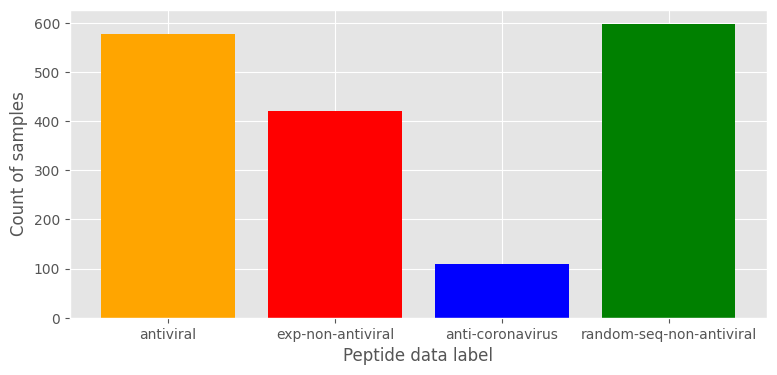

In [170]:
# visualization of different types
import matplotlib.pyplot as plt

antiviral = df['label'].value_counts()['antiviral']
expnonantiviral = df['label'].value_counts()['exp-non-antiviral']
anticoronavirus = df['label'].value_counts()['anti-coronavirus']
randomseqnonantiviral = df['label'].value_counts()['random-seq-non-antiviral']
xlabels = ['antiviral', 'exp-non-antiviral', 'anti-coronavirus','random-seq-non-antiviral']
ycounts = [antiviral, expnonantiviral, anticoronavirus, randomseqnonantiviral]
plt.figure(figsize=(9,4))
c = ['orange', 'red', 'blue', 'green']
plt.bar(xlabels,ycounts,color=c)
plt.xlabel('Peptide data label')
plt.ylabel('Count of samples')
plt.show()

In [171]:
from collections import Counter

def cnt(x,i):
  res = Counter(x)
  return res[i]

def colorApply(x):
    if(x=="antiviral"):
        return "orange"
    elif(x=="exp-non-antiviral"):
        return "red"
    elif(x=="anti-coronavirus"):
        return "blue"
    else:
        return "green"

In [172]:
# add count of each amino acid in the peptide sequence and length of peptide sequence
seq = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'X', 'B', 'Z' , 'J']
for i in seq:
  df[i] = df.sequence.apply(lambda x: cnt(x,i))

df['len'] = df.sequence.apply(lambda x: len(x))
df['color'] = df.label.apply(lambda x: colorApply(x))

df.to_csv("visualize_dataset.csv", index=False)
df

,sequence,label,A,C,D,E,F,G,H,I,...,T,V,W,Y,X,B,Z,J,len,color
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,antiviral,3,0,3,4,0,3,0,2,...,1,1,0,0,0,0,0,0,34,orange
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,antiviral,3,0,2,4,0,3,1,3,...,1,1,0,0,0,0,0,0,34,orange
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,antiviral,3,0,2,4,0,3,0,3,...,1,1,0,0,0,0,0,0,34,orange
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,antiviral,3,0,2,4,0,2,0,2,...,1,1,0,0,0,0,0,0,34,orange
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,antiviral,3,0,2,4,0,3,0,2,...,1,1,0,0,0,0,0,0,34,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,anti-coronavirus,6,1,0,2,0,1,0,2,...,3,1,0,1,0,0,0,0,34,blue
1699,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,anti-coronavirus,1,0,2,5,0,1,0,3,...,0,2,3,3,0,0,0,0,37,blue
1700,LFGLIPSLIGGLVSAFK,anti-coronavirus,1,0,0,0,2,3,0,2,...,0,1,0,0,0,0,0,0,17,blue
1701,LFRLIKSLIKRLVSAFK,anti-coronavirus,1,0,0,0,2,0,0,2,...,0,1,0,0,0,0,0,0,17,blue


Text(0, 0.5, 'Length of Sequence')

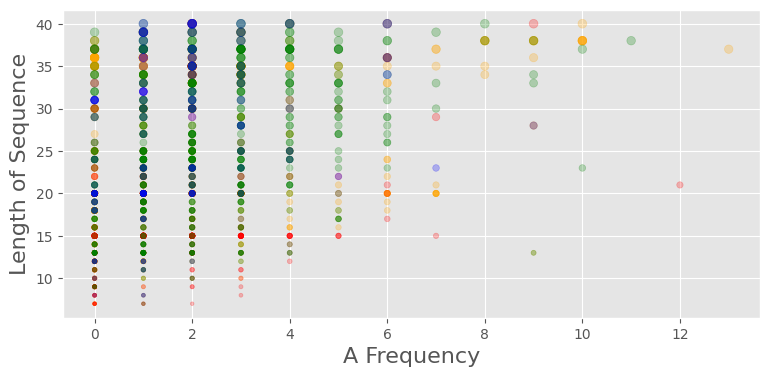

In [177]:
# Specifying the frequency of amino acid per length of peptide
charr = 'A'
plt.figure(figsize=(9,4))
plt.style.use('ggplot')
plt.scatter(x=df[charr], y=df['len'], s=df['len'],alpha=0.25,c=df['color'])
plt.xlabel(charr + " Frequency", size=16)
plt.ylabel("Length of Sequence", size=16)

Text(0, 0.5, 'Length of Sequence')

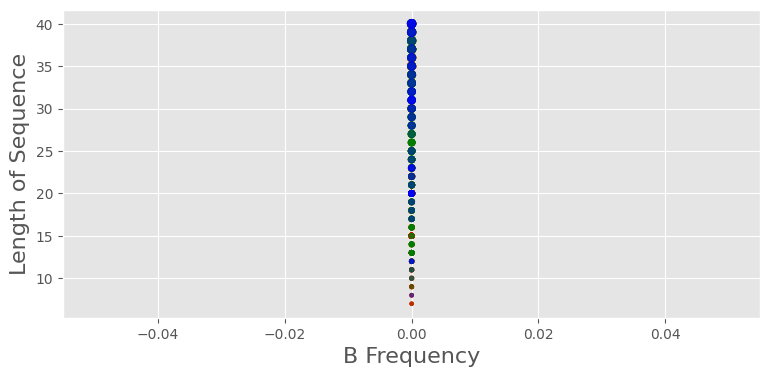

In [178]:
charr = 'B'
plt.figure(figsize=(9,4))
plt.style.use('ggplot')
plt.scatter(x=df[charr], y=df['len'], s=df['len'],alpha=0.25,c=df['color'])
plt.xlabel(charr + " Frequency", size=16)
plt.ylabel("Length of Sequence", size=16)

Text(0, 0.5, 'Length of Sequence')

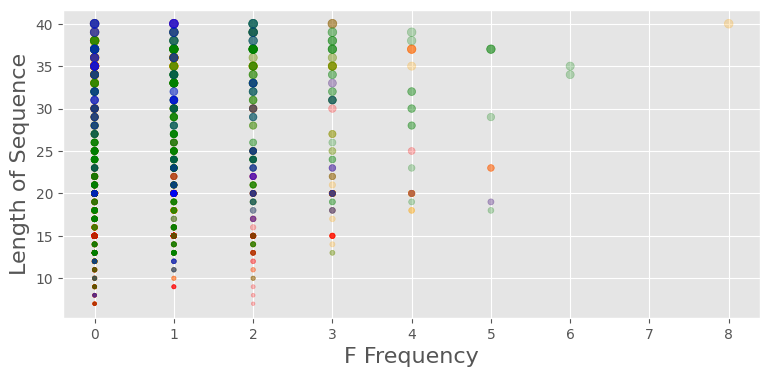

In [179]:
charr = 'F'
plt.figure(figsize=(9,4))
plt.style.use('ggplot')
plt.scatter(x=df[charr], y=df['len'], s=df['len'],alpha=0.25,c=df['color'])
plt.xlabel(charr + " Frequency", size=16)
plt.ylabel("Length of Sequence", size=16)

Text(0, 0.5, 'Length of Sequence')

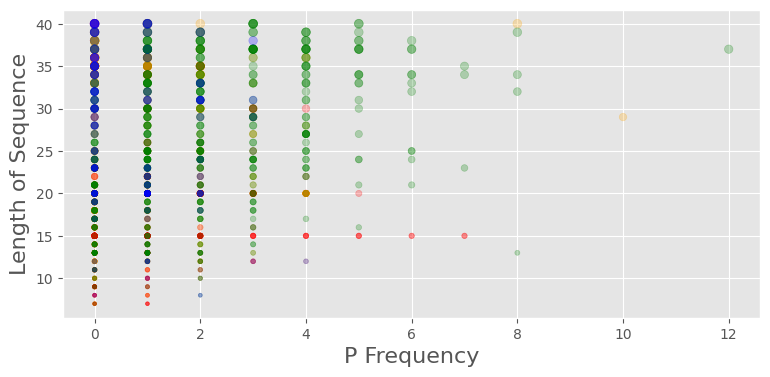

In [180]:
charr = 'P'
plt.figure(figsize=(9,4))
plt.style.use('ggplot')
plt.scatter(x=df[charr], y=df['len'], s=df['len'],alpha=0.25,c=df['color'])
plt.xlabel(charr + " Frequency", size=16)
plt.ylabel("Length of Sequence", size=16)

In [181]:
# add columns for percentage of each amino acid present in peptide sequence
seq = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'X', 'B', 'Z' , 'J']

for i in seq: 
    df["per"+i] = df.sequence.apply(lambda x: cnt(x,i)/len(x))

df.to_csv("visualize_dataset2.csv", index=False)
df


,sequence,label,A,C,D,E,F,G,H,I,...,perR,perS,perT,perV,perW,perY,perX,perB,perZ,perJ
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,antiviral,3,0,3,4,0,3,0,2,...,0.029412,0.088235,0.029412,0.029412,0.000000,0.000000,0.0,0.0,0.0,0.0
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,antiviral,3,0,2,4,0,3,1,3,...,0.058824,0.029412,0.029412,0.029412,0.000000,0.000000,0.0,0.0,0.0,0.0
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,antiviral,3,0,2,4,0,3,0,3,...,0.029412,0.088235,0.029412,0.029412,0.000000,0.000000,0.0,0.0,0.0,0.0
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,antiviral,3,0,2,4,0,2,0,2,...,0.058824,0.088235,0.029412,0.029412,0.000000,0.000000,0.0,0.0,0.0,0.0
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,antiviral,3,0,2,4,0,3,0,2,...,0.029412,0.088235,0.029412,0.029412,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,anti-coronavirus,6,1,0,2,0,1,0,2,...,0.088235,0.088235,0.088235,0.029412,0.000000,0.029412,0.0,0.0,0.0,0.0
1699,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,anti-coronavirus,1,0,2,5,0,1,0,3,...,0.027027,0.027027,0.000000,0.054054,0.081081,0.081081,0.0,0.0,0.0,0.0
1700,LFGLIPSLIGGLVSAFK,anti-coronavirus,1,0,0,0,2,3,0,2,...,0.000000,0.117647,0.000000,0.058824,0.000000,0.000000,0.0,0.0,0.0,0.0
1701,LFRLIKSLIKRLVSAFK,anti-coronavirus,1,0,0,0,2,0,0,2,...,0.117647,0.117647,0.000000,0.058824,0.000000,0.000000,0.0,0.0,0.0,0.0


In [182]:
def avg_per(i, type, list):
    import csv
    sum = 0
    filename = 'visualize_dataset2.csv'
    row_no = 0
    peptide_cnt = 0
    with open(filename, 'r') as csvfile:
        data = csv.reader(csvfile)
        for row in data:
            if(row_no > 0):
                if(row[1] == type):
                    sum = sum + float(row[i])
                    peptide_cnt = peptide_cnt+1
            row_no = row_no+1
    avg=sum/peptide_cnt*100
    list.append(avg)
    return list

In [183]:
# calculating average amino acid percentage for all different types of data labels
antiviral_per_list = []
for i in range(28,48):
    antiviral_list = avg_per(i,'antiviral', antiviral_per_list)
print("antiviral_per_list")
print(antiviral_per_list)

expnonantiviral_per_list = []
for i in range(28,48):
    antiviral_list = avg_per(i,'exp-non-antiviral', expnonantiviral_per_list)
print("expnonantiviral_per_list")
print(expnonantiviral_per_list)

anticoronavirus_per_list = []
for i in range(28,48):
    antiviral_list = avg_per(i,'anti-coronavirus', anticoronavirus_per_list)
print("anticoronavirus_per_list")
print(anticoronavirus_per_list)

randomseqnonantiviral_per_list = []
for i in range(28,48):
    antiviral_list = avg_per(i,'random-seq-non-antiviral', randomseqnonantiviral_per_list)
print("randomseqnonantiviral_per_list")
print(randomseqnonantiviral_per_list)


antiviral_per_list
[7.389252286473775, 3.4903332986735625, 3.7409508006833008, 6.3867091522197, 3.832530214486094, 4.837255256891321, 1.3176789417733004, 7.05046872233581, 9.03174296286575, 12.176666455977186, 1.0792282996500604, 4.034836496280234, 3.3912105822581196, 3.7340187403232283, 8.06803018704244, 5.556945389645029, 3.332236930278312, 4.990305709608855, 4.4787430046337136, 2.0808565679003035]
expnonantiviral_per_list
[7.872026499760413, 3.3169808883318206, 4.198070799378846, 5.198177291670578, 3.6195644354635172, 5.9817503073414, 2.072867053539447, 4.69143205996145, 7.601280634296645, 9.072514254877483, 1.4641025813386048, 4.90687879876314, 5.468190406132902, 3.6623448694428045, 7.92304865653217, 5.63033730393533, 5.675326246957365, 6.342369874034043, 2.2232490695789324, 3.0794879686631145]
anticoronavirus_per_list
[6.22579731117816, 4.269144395684241, 3.691560865771002, 5.013004069098204, 4.416009963135925, 7.187685380034443, 1.4000436419679925, 7.338347004732275, 7.5665060465

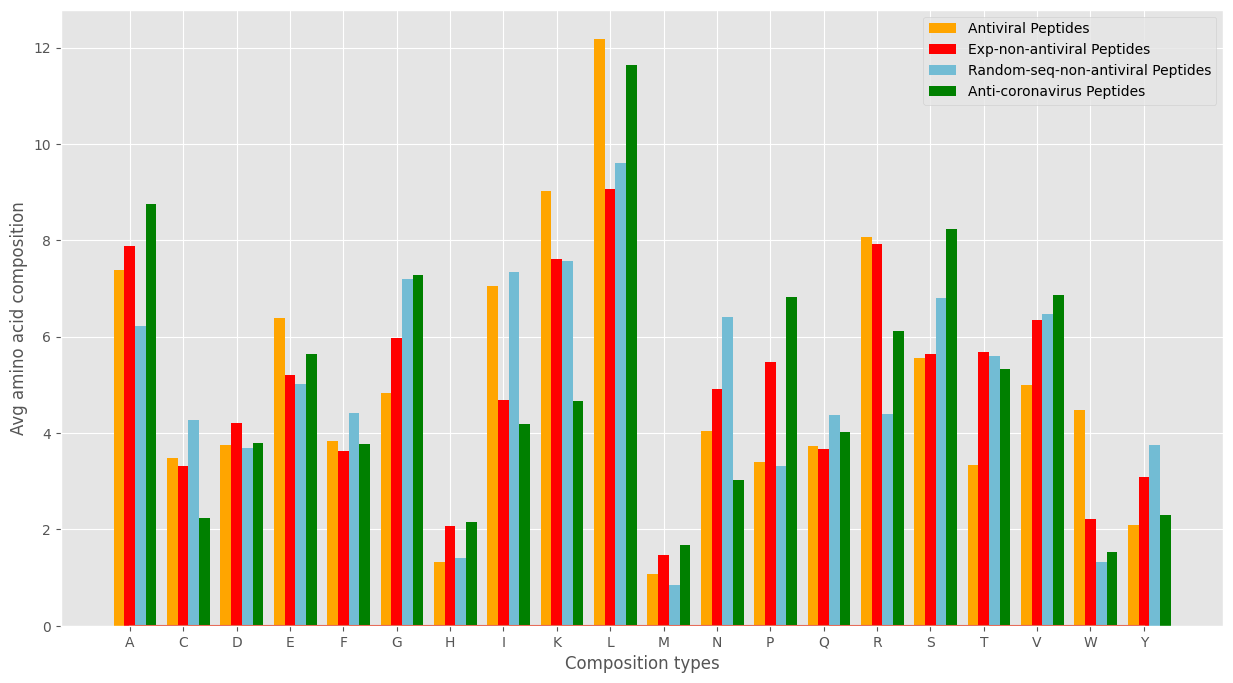

In [184]:
# For a particular amino acid specifying it's percentage of average amino acid composition
seq = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
types = ['Antiviral Peptides', 'Exp-non-antiviral Peptides', 'Random-seq-non-antiviral Peptides', 'Anti-coronavirus Peptides']

width = 0.2

initial = [0 for element in range(20)]

width_0 = [x - width for x in range (20)]
width_1 = [x for x in range (20)]
width_2 = [x + width for x in range (20)]
width_3 = [x + 2*width for x in range (20)]

plt.rcParams["figure.figsize"] = (15,8)
plt.plot(seq,initial)

plt.bar(width_0,antiviral_per_list,width, label = types[0],color='orange')
plt.bar(width_1,expnonantiviral_per_list,width, label = types[1],color='red')
plt.bar(width_2,anticoronavirus_per_list,width, label = types[2],color='#72bcd4')
plt.bar(width_3,randomseqnonantiviral_per_list,width, label = types[3],color='green')


plt.xlabel('Composition types')
plt.ylabel('Avg amino acid composition')
plt.legend()
plt.show()

# Music conversion

In [2]:
# Dictionary to be used for converting amino acid abbreviations

aa_3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S',
'GLN': 'Q', 'LYS':'K','ILE': 'I', 'PRO': 'P',
 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 'GLY': 'G',
 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W',
 'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

In [3]:
import pandas as pd
nu_df = pd.read_csv('aa_freq.csv', sep=',',header=0)
# replace NA's with 0's
nu_df.fillna(0,inplace=True)
nu_df

,Overtone,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,Ala(A),60,222,235,268,331,417,492,560,635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cys(C),53,101,178,206,249,276,338,429,485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Asp(D),45,70,87,154,239,291,335,365,441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Glu(E),20,41,65,102,112,215,240,245,309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Phe(F),29,54,58,94,181,241,290,295,315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Gly(G),66,240,290,455,544,603,707,833,853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,His(H),27,74,80,127,219,276,309,323,343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Ile(I),52,59,82,149,216,224,256,277,290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Lys(K),43,61,63,86,135,150,187,227,243,...,3565.0,3745.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Leu(L),14,39,100,139,226,239,245,259,299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from scipy.constants import speed_of_light as speedlight
nu = nu_df.values

In [6]:
nu = nu_df.values
for ro in range(nu.shape[0]):
    for co in range(nu.shape[1]):
        if co == 0:
        #Convert amino acid code from 3 letter to 1 letter
            aa = nu[ro][co]
            aa = aa[0:3].upper()
            nu[ro][co]= aa_3to1[aa]
        else:
        # Convert from wavenumber to frequency
        # wavelength = 1/wavenumber
        # frequency = speed of light / wavelength
            if nu[ro][co] > 0:
                freq = speedlight / (1/nu[ro][co])

In [7]:
aa_list = nu[:,0]      # list of amino acids
nu = nu[:,1:]          # remove first column                
max_freq = nu.max()    # max and min 
min_freq = nu.min()    # need to exclude first column
human_range = 20000 - 20
for ro in range(nu.shape[0]):
    for co in range(nu.shape[1]):
        if nu[ro][co] > 0:
            # First scale to 0 to 1
            nu[ro][co] = (nu[ro][co] - min_freq)/ max_freq - min_freq
            # Scale to human hearing range 20 - 20000 Hz
            nu[ro][co] = (nu[ro][co] * human_range) + 20

In [35]:
def aa_note(aa,length):
    row = np.where(aa_list == aa)[0][0]
    print(row)
    wave = np.zeros(int(44100 * float(length)))
    harm = 0
 
    for freq in nu[row]:
        if freq == 0:
            break
        else:
            volume = np.exp(-harm)
            phases = np.cumsum(2.0 * np.pi * freq / 44100 * np.ones(int(44100 * float(length))))
            wave += np.sin(phases) * volume
            harm += 1
    # scale wave to values between 1 and -1
    wave = 2.*(wave - wave.min())/np.ptp(wave)-1
    return wave

In [36]:
from synthesizer import Player, Synthesizer
player = Player()
player.open_stream()

In [37]:
df = pd.read_csv("final_dataset.csv")
seq_df = df.drop('label',axis=1)

seq_df.to_csv("sequence_only_dataset.csv",index=False)

In [61]:
import csv
import numpy as np

all_melodies=[]

# Open file 
with open('sequence_only_dataset.csv') as file_obj:
      
    # Create reader object by passing the file object to reader method
    reader_obj = csv.reader(file_obj)
    count = 0
    # Iterate over each row in the csv file using reader object
    for row in reader_obj:
        if count==0:
            count += 1
            continue
        protein_sequence = str(row)
        unit_length = 0.5
        melodic_sequence = []
        for residue in protein_sequence:
            if residue!='[' and residue!="'" and residue!="]":
                sound_wave = aa_note(residue,unit_length)
                melodic_sequence = melodic_sequence + sound_wave.tolist()
        melody = np.asarray(melodic_sequence)
        melody = 2*(melody - melody.min())/np.ptp(melody)-1
        all_melodies.append(melody)
        count += 1

2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
6
14
7
2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
7
2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
7
9
14
15
10
8
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
9
6
14
7
2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
7
9
14
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
7
9
14
7
2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
7
9
14
15
10
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
17
15
17
9
16
15
8
17
9
2
9
8
11
19
7
2
8
13
0
17
15
8
17
9
6
9
3
5
3
17
11
8
7
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
17
15
17
3
17
11
8
7
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
1

10
11
13
15
9
13
13
15
8
2
19
7
8
3
0
13
8
7
9
2
16
17
8
17
2
7
15
15
13
7
15
15
10
11
13
15
9
13
13
15
8
2
19
7
8
3
0
13
14
9
9
2
16
17
11
12
15
9
16
15
13
11
7
14
15
0
3
12
3
14
14
11
7
8
19
9
0
7
12
1
5
3
15
1
17
18
7
12
1
7
15
0
0
7
5
1
15
1
8
11
8
17
1
19
14
0
8
7
16
4
16
11
11
6
12
14
16
7
18
12
1
5
3
15
1
0
10
7
15
4
1
4
16
3
17
7
5
1
15
1
8
11
8
17
1
19
9
11
15
7
15
1
5
3
15
1
17
4
7
12
1
7
16
15
17
0
5
1
15
1
8
15
8
17
1
19
14
11
5
7
12
1
5
15
17
4
9
17
5
13
9
4
16
4
15
12
14
6
6
1
9
5
17
5
15
1
11
2
4
0
5
1
5
19
0
7
17
1
4
18
2
1
12
11
5
12
18
17
18
17
12
0
4
1
13
0
17
5
18
5
2
14
3
7
11
11
19
16
15
9
7
6
15
9
7
3
3
15
13
11
13
13
3
8
11
3
13
3
9
9
3
9
2
8
18
0
3
3
9
0
8
8
0
3
3
9
0
8
8
0
3
3
9
0
8
8
0
3
3
9
0
8
8
0
18
0
15
9
18
11
18
4
3
18
2
14
3
7
11
11
19
16
15
9
7
6
15
9
7
3
3
15
13
11
13
13
3
8
11
3
13
3
9
9
3
9
2
8
4
8
1
14
14
18
13
18
14
10
4
8
14
7
17
13
14
7
8
2
4
9
14
5
0
2
4
13
3
1
10
8
3
6
15
13
8
13
6
13
6
13
5
5
2
12
16
4
1
5
3
16
1
14
17
7
12
17
1
16
19
15
0
0

19
16
15
9
7
6
15
9
7
3
13
15
13
11
13
13
3
8
11
3
13
3
9
9
3
9
2
8
18
0
15
9
18
11
18
4
19
16
15
9
7
6
15
9
7
13
3
15
13
11
13
13
3
8
11
3
13
3
9
9
3
9
2
8
18
0
15
9
18
11
18
4
19
16
15
9
7
13
15
9
7
3
3
15
13
11
13
13
3
8
11
3
13
3
9
9
3
9
2
8
18
0
15
9
18
11
18
4
19
16
15
9
7
13
15
9
7
3
3
15
13
11
13
13
3
8
11
3
13
13
9
9
3
9
2
8
18
0
15
9
18
11
18
4
0
9
18
8
16
10
9
8
8
9
5
16
10
0
9
6
0
5
8
0
0
9
5
0
0
0
2
16
7
15
13
5
16
13
5
9
4
5
17
9
0
8
17
0
0
6
17
17
12
0
7
0
3
6
4
5
9
9
15
17
9
5
15
17
0
8
6
17
9
12
6
17
17
12
17
7
0
3
6
9
1
5
14
9
9
9
14
14
13
14
14
14
0
6
13
11
3
18
14
8
8
14
19
15
16
13
17
4
4
5
8
17
9
8
9
7
14
8
7
4
4
4
6
6
7
4
14
5
7
17
6
17
5
8
16
7
6
14
9
17
16
5
5
4
8
2
9
9
8
5
0
0
8
0
9
17
8
16
17
9
4
5
4
9
2
7
7
3
8
7
0
8
15
18
5
4
9
15
7
9
8
8
17
9
12
8
17
10
0
6
10
8
5
4
11
3
7
17
13
2
7
3
2
4
9
13
11
9
17
5
7
5
0
17
9
8
17
9
16
16
5
9
12
0
9
7
15
18
7
8
14
8
14
13
13
5
7
7
2
7
0
8
8
9
4
3
15
18
5
7
18
2
16
7
8
15
10
5
8
17
4
0
5
8
7
9
13
11
9
5
7
18
15
2
9
0
3

14
15
11
13
8
9
2
15
7
5
11
11
15
17
0
9
2
12
7
2
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
11
15
17
0
9
2
12
7
2
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
12
7
2
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
7
5
11
18
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
7
5
11
18
6
13
15
15
17
0
9
2
12
7
2
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
1
0
16
1
3
13
7
0
2
15
13
6
14
15
6
14
13
10
17
1
0
16
1
13
7
0
2
15
6
14
15
6
14
13
10
17
12
12
18
1
1
1
15
12
10
8
14
0
15
12
12
12
0
13
15
2
9
12
0
16
12
8
1
12
12
14
14
8
8
0
0
17
0
9
9
12
0
17
9
9
0
9
9
0
12
14
14
8
8
0
17
9
9
0
9
9
0
12
14
14
8
8
9
12
0
17
9
9
0
9
9
0
12
14
14
8
8
12
0
17
9
9
0
9
9
0
12
14
14
8
8
17
9
9
0
9
9
0
12
14
14
8
8
0
0
17
0
9
9
0
17
9
9
0
9
9
0
14
14
8
8
17
0
9
9
0
17
9
9
0
9
9
0
5
9
9
14
8
5
5
3
8
7
5
3
8
9
8
8
7
5
13
8
7
8
11
4
4
13
8
9
17
12
13
12
3
13
14
8
0
17
9
9
0
9
9
0
14
8
8
9
0
17
9
9
0
9
9
0
14
14
8
8
0
0

2
8
19
8
11
0
17
16
3
9
7
8
3
11
8
1
11
5
16
2
0
8
17
8
9
7
8
13
3
9
2
8
19
8
11
0
17
16
3
9
13
9
9
10
13
7
16
7
3
9
15
11
7
8
3
11
8
1
11
5
16
2
0
8
17
8
9
7
8
13
3
9
2
8
19
8
11
0
17
16
8
3
11
8
1
11
5
16
2
0
8
17
8
9
7
8
13
3
9
2
8
19
8
11
0
17
16
3
9
13
9
9
10
13
15
9
15
11
7
8
3
11
8
1
11
5
16
2
0
8
17
8
9
7
8
13
3
9
2
8
19
8
11
0
17
16
3
9
13
9
11
7
8
3
11
8
1
11
5
16
2
0
8
17
8
9
7
8
13
3
9
2
8
19
8
11
0
17
16
3
9
13
9
9
10
15
11
7
8
3
11
8
1
11
5
16
2
0
8
17
8
9
7
8
13
3
9
2
8
19
8
11
0
17
16
3
9
13
9
9
16
7
3
9
15
11
7
8
3
11
8
1
11
5
16
2
0
8
17
8
9
7
8
13
3
9
2
8
19
8
11
0
17
16
3
1
5
14
1
9
13
14
0
1
1
8
19
1
14
9
8
1
14
9
7
9
4
17
7
4
1
17
16
1
8
15
16
17
9
1
2
8
10
13
6
12
1
14
14
5
12
14
1
7
15
1
9
9
12
7
17
5
11
9
9
11
15
9
9
15
9
7
5
5
9
17
15
0
4
8
9
4
5
9
7
12
15
9
7
5
5
9
17
15
0
4
8
9
13
10
2
2
4
3
9
9
1
0
1
7
0
2
6
15
6
1
16
1
7
0
2
6
14
6
3
3
2
2
9
0
17
9
9
0
9
9
0
14
14
8
8
0
0
9
9
17
9
0
0
9
0
17
9
0
14
14
8
8
0
0
17
14
14
8
8
0
0
17
0
14
14
8
8
0
0
17
0
9
14
1

5
9
16
5
5
4
19
3
12
9
17
14
14
1
15
3
9
10
5
14
5
11
13
5
14
5
11
12
17
14
15
12
9
5
4
5
15
19
16
10
5
15
14
7
12
16
5
3
14
17
18
2
14
5
11
17
16
9
9
1
6
9
8
7
9
11
16
12
11
1
0
9
13
6
18
15
6
5
13
11
13
18
12
9
15
1
12
13
19
17
19
5
15
7
9
11
16
12
11
1
0
9
13
7
17
0
7
15
15
3
17
6
7
12
9
5
2
0
14
9
17
7
16
16
19
18
5
9
6
16
5
3
14
2
18
6
9
7
17
18
13
17
2
14
10
8
1
12
16
12
0
7
3
12
12
16
5
16
4
5
4
4
12
5
17
8
11
11
11
14
13
17
1
7
2
12
8
9
8
12
17
15
9
15
19
8
12
17
15
9
15
19
14
8
12
17
15
9
15
19
14
1
8
12
17
15
9
15
19
14
1
12
8
12
17
15
9
15
19
14
1
12
1
14
4
4
3
8
12
17
15
9
15
19
14
1
12
1
14
4
4
3
15
9
5
2
0
14
9
17
7
16
16
19
18
5
9
6
16
9
5
15
15
2
14
2
16
17
17
3
9
15
3
18
5
17
12
1
17
9
13
0
14
7
9
0
17
3
14
19
9
8
2
13
13
13
9
15
1
12
13
19
17
19
5
15
17
15
17
16
1
17
18
5
15
17
9
15
15
5
14
12
2
5
4
7
6
17
13
5
6
9
13
3
17
2
9
15
19
14
1
12
1
14
4
4
3
15
10
3
11
14
18
13
17
10
11
14
13
17
1
7
2
12
8
9
8
18
7
11
17
8
6
9
8
7
9
11
16
12
11
1
12
1
14
4
4
3
15
12
1
14
4
4

17
7
0
3
8
9
2
18
6
9
5
13
5
17
15
7
3
18
14
8
8
4
9
4
12
9
7
16
15
4
9
15
8
17
9
5
9
4
2
7
7
8
8
7
0
3
15
18
5
18
9
8
8
7
3
15
7
7
2
0
4
6
17
2
8
8
17
0
2
8
17
9
9
9
8
13
9
14
7
10
14
9
9
16
14
9
16
16
18
3
0
18
2
14
0
7
0
3
19
0
0
14
7
3
0
9
7
14
0
0
13
3
13
13
3
8
11
3
0
7
9
14
3
9
16
16
18
3
0
18
2
14
0
7
0
3
19
0
0
14
7
3
0
9
7
14
0
15
13
3
13
13
3
8
11
3
0
3
9
14
3
9
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
7
5
11
18
6
13
15
15
16
16
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
7
5
11
18
6
13
15
15
16
0
0
6
9
7
2
0
9
19
0
3
4
9
5
5
14
17
9
16
16
6
14
18
14
8
14
18
14
8
6
14
18
14
8
14
18
14
8
8
14
18
14
8
14
18
14
8
18
14
18
14
8
14
18
14
8
14
16
14
8
14
5
14
8
14
16
14
8
14
5
14
8
14
5
5
8
7
0
5
8
7
0
8
7
0
5
8
7
0
8
7
0
5
8
7
0
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
7
5
11
18
6
13
15
14
14
8
8
0
0
17
0
9
9
12
0
17
9
9
0
14
14
8
8
0
0
17
0
9
9
12
0
17
9
9
0
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
2
0

16
0
12
13
12
5
15
0
17
13
5
0
6
7
15
15
14
1
18
4
9
0
18
11
12
0
5
16
9
9
0
15
1
5
5
2
14
14
7
14
7
18
5
2
6
9
9
15
0
17
3
11
3
9
13
15
16
5
1
17
7
0
5
14
9
0
11
17
2
3
11
9
8
17
9
9
7
3
11
5
3
11
11
9
11
7
3
9
4
11
0
4
12
15
9
9
14
6
4
12
5
15
6
11
16
7
4
8
11
10
16
3
13
14
8
0
13
8
2
9
18
2
0
7
17
7
5
0
14
2
7
17
11
9
8
8
15
3
4
18
11
8
5
5
12
0
18
13
8
7
14
15
17
9
17
8
5
1
13
12
9
9
15
0
12
14
3
5
12
5
6
12
14
17
12
16
5
3
5
0
5
10
15
15
7
5
17
4
8
11
7
3
19
10
1
15
14
16
15
15
8
16
18
5
8
2
0
19
7
16
9
1
4
18
18
0
4
15
16
15
0
9
17
15
15
13
13
7
12
9
8
14
14
15
12
15
12
16
12
16
12
5
12
15
14
14
5
12
15
9
5
0
15
15
6
13
6
15
14
14
14
13
5
18
9
8
3
7
14
0
0
0
0
0
0
0
0
0
5
3
16
15
0
9
0
14
3
9
3
3
9
11
17
12
5
3
7
17
3
15
9
7
7
10
9
2
17
2
12
14
14
12
0
12
13
9
16
15
14
12
19
4
15
12
6
6
11
11
19
8
8
11
2
3
9
3
4
17
14
16
5
19
5
8
2
10
17
8
17
3
8
16
9
16
0
9
12
5
9
4
9
13
11
13
12
5
9
15
0
0
15
6
14
7
12
9
15
2
5
11
15
7
12
7
7
5
9
5
16
19
15
3
12
8
15
16
12
8
5
0
1
0
16
15
17
4


3
0
11
8
16
19
11
1
15
3
17
15
0
15
0
7
17
12
1
9
15
12
12
5
15
9
17
4
3
2
4
0
11
9
16
12
4
17
8
9
6
15
15
15
15
4
15
15
13
0
17
10
10
16
8
12
10
13
3
6
8
8
3
19
7
0
18
3
0
5
8
12
9
1
7
3
3
17
3
17
0
12
12
3
4
5
17
9
9
9
9
16
9
16
17
5
0
17
14
15
5
11
0
0
0
15
15
16
12
0
8
11
7
8
8
5
12
0
12
4
19
12
9
3
2
5
16
0
5
3
13
9
6
8
0
10
8
14
19
0
9
17
12
5
16
7
0
15
16
3
5
17
12
9
15
3
16
11
11
14
15
6
0
16
12
15
0
13
19
1
13
10
16
17
3
3
16
1
15
19
12
0
5
15
9
9
14
13
15
12
13
12
14
6
16
4
19
0
5
12
14
9
15
0
15
0
7
9
15
17
4
8
16
0
8
16
5
17
9
11
0
0
0
6
14
19
14
5
4
15
8
0
5
17
14
9
10
15
17
8
0
13
16
0
11
11
9
14
8
4
8
15
8
9
5
2
14
14
13
3
12
14
17
16
8
15
0
7
3
8
9
14
8
9
3
15
5
5
5
5
3
5
5
3
5
16
3
3
3
2
5
0
3
14
3
0
0
9
3
14
12
14
14
8
7
16
3
9
11
12
6
9
10
1
17
9
1
5
5
19
4
7
2
0
16
16
7
7
3
7
8
8
12
9
15
7
3
13
7
3
17
0
12
12
8
0
6
3
17
14
7
8
10
18
11
0
9
13
2
14
2
15
0
3
17
12
12
5
14
5
13
3
8
15
8
16
2
1
6
5
5
10
15
5
16
7
19
3
19
5
0
12
18
12
0
3
12
0
12
4
19
3
12
5
14
9
9
4
9
1

18
12
5
7
9
17
5
5
0
14
17
0
15
1
14
19
12
0
9
5
12
14
9
0
14
15
17
8
5
9
17
0
9
7
16
5
5
0
15
5
9
0
0
0
0
9
14
0
14
7
9
13
17
15
15
8
17
11
9
9
4
19
17
11
5
14
8
17
16
3
8
11
17
2
12
3
16
10
9
9
12
19
9
16
5
1
1
7
0
5
14
9
0
11
9
2
2
13
11
9
16
17
0
9
5
15
7
9
5
4
9
13
7
0
16
17
9
16
17
9
9
9
9
9
8
5
13
3
13
0
13
9
19
3
7
16
11
8
5
19
5
8
2
0
17
8
17
10
6
7
11
14
8
5
12
17
6
15
7
13
3
9
3
17
0
0
14
13
7
5
15
1
9
10
14
1
14
16
9
2
16
16
15
12
4
15
11
13
12
12
17
6
14
15
12
4
3
2
12
19
12
3
2
13
12
6
4
2
14
15
5
12
15
14
2
15
17
8
15
19
5
2
2
8
14
15
7
11
2
18
5
1
14
5
14
14
18
0
4
0
14
17
2
5
5
15
1
6
14
14
5
0
12
16
5
15
16
15
11
13
7
14
19
0
8
12
5
0
17
14
15
12
0
13
7
9
13
18
13
17
9
12
11
16
17
12
0
8
15
14
10
0
5
12
18
9
15
9
6
3
0
14
9
9
5
16
14
5
0
0
0
12
8
0
17
15
7
15
11
14
0
0
17
12
3
6
5
17
0
12
2
0
3
14
9
4
0
14
16
10
7
5
17
4
8
11
7
3
19
10
1
8
14
16
3
15
1
9
9
9
4
15
17
18
14
13
15
15
5
16
12
5
15
8
7
15
17
7
14
15
8
14
17
7
13
0
11
16
7
15
15
1
2
7
7
7
15
2
12
11
4
15
10

9
9
0
9
0
0
14
12
0
9
0
5
12
12
0
0
0
9
13
12
18
17
11
7
4
9
12
17
9
0
7
4
9
7
19
7
7
4
8
9
17
0
12
17
16
4
14
6
6
14
19
2
2
9
17
14
16
9
19
8
17
13
11
3
1
12
5
7
16
14
17
19
15
7
5
14
3
12
0
5
5
1
9
1
2
13
12
17
6
7
0
17
14
5
9
0
12
3
13
15
16
0
17
1
7
15
8
10
17
12
5
1
15
7
16
17
7
15
2
8
4
16
12
3
16
16
15
2
17
0
0
5
14
12
0
6
12
9
2
12
9
15
16
0
3
7
8
0
0
16
11
16
17
8
15
19
4
0
5
1
14
7
16
8
12
0
9
9
17
9
11
13
3
16
0
8
17
17
13
16
8
0
3
17
1
10
0
17
12
18
9
15
9
13
15
6
9
3
9
11
11
5
16
8
10
12
16
9
5
9
5
16
9
16
11
0
3
3
4
16
12
8
17
16
8
16
7
0
13
2
15
4
2
7
9
15
4
2
2
18
3
12
8
8
12
4
15
7
3
3
17
3
17
0
12
12
8
0
6
3
17
14
7
8
7
9
0
16
9
9
9
12
3
0
0
0
3
14
2
0
14
3
8
9
0
9
18
2
14
14
12
2
16
16
0
12
9
12
11
2
5
6
2
6
12
3
8
8
2
12
2
16
16
12
8
13
17
0
5
17
9
9
0
9
15
9
17
9
9
19
14
19
0
16
19
15
6
5
4
4
8
8
9
5
7
12
5
12
8
12
9
12
9
4
5
11
17
9
15
19
8
9
17
17
17
5
2
5
5
17
5
8
15
0
9
16
7
13
9
7
13
11
6
4
17
3
3
19
2
12
16
7
3
2
15
19
14
3
3
9
11
0
15
5
3
16
17
3
15
9
15
15


16
12
5
1
16
1
15
18
12
17
1
16
14
11
5
0
4
5
11
4
9
8
5
17
0
8
8
0
5
9
8
7
9
15
7
0
13
1
8
9
15
5
16
1
5
18
4
8
8
0
18
14
8
17
8
11
0
5
14
14
17
9
8
5
17
5
7
6
19
5
17
5
9
7
5
15
17
9
11
1
5
3
16
1
9
9
5
16
1
19
16
16
5
1
16
1
11
8
19
14
17
1
16
8
2
14
14
1
7
1
16
16
14
16
1
14
4
12
19
14
14
9
5
16
1
7
4
13
11
14
17
19
16
4
1
1
0
1
19
1
14
7
5
0
1
17
15
5
3
14
9
16
5
0
1
5
9
11
5
14
7
19
14
9
1
1
14
5
17
7
12
1
5
3
15
1
17
4
7
12
1
7
15
16
9
9
5
1
15
1
8
11
8
17
1
19
14
11
5
17
7
12
1
5
3
15
1
17
4
7
12
1
7
15
0
0
7
5
1
15
1
8
11
8
17
1
19
14
11
8
7
12
1
5
3
15
1
17
18
7
12
1
17
16
15
7
4
11
1
8
1
8
3
11
8
17
1
19
6
2
5
15
7
12
0
1
5
3
15
1
4
8
5
8
1
19
16
12
5
1
15
1
15
8
19
12
9
1
0
8
11
1
5
3
15
1
17
4
7
12
1
7
16
16
17
9
5
1
15
1
15
7
8
17
1
19
8
11
5
15
7
12
0
16
1
19
1
14
16
5
14
1
0
16
14
3
15
9
15
5
17
1
3
7
15
5
14
9
19
14
9
1
1
14
0
4
16
1
6
1
14
14
15
1
19
15
16
3
19
15
19
5
16
1
16
17
10
5
7
11
6
14
4
1
1
9
17
16
1
19
1
14
14
16
14
1
5
4
14
3
14
9
15
5
0
1
5
19
14
5
14
7
1

In [56]:
print(all_melodies)

[array([ 0.02981618,  0.07587282,  0.12143092, ..., -0.25667037,
       -0.24604874, -0.23435115]), array([0.02527297, 0.06263321, 0.09962388, ..., 0.52622807, 0.51296724,
       0.49920721]), array([0.03748943, 0.08362291, 0.12938657, ..., 0.48236305, 0.50380884,
       0.5262466 ]), array([0.01687699, 0.04409607, 0.07101299, ..., 0.1979858 , 0.20765797,
       0.2172767 ]), array([0.01687699, 0.04409607, 0.07101299, ..., 0.13870349, 0.12266604,
       0.10686744]), array([ 0.01687699,  0.04409607,  0.07101299, ..., -0.23374205,
       -0.2334336 , -0.23354356]), array([ 0.02973901,  0.07264148,  0.11391971, ..., -0.41464586,
       -0.41905871, -0.42305494]), array([ 0.02973901,  0.07264148,  0.11391971, ..., -0.23374205,
       -0.2334336 , -0.23354356]), array([0.0234929 , 0.04974969, 0.07594072, ..., 0.48236305, 0.50380884,
       0.5262466 ])]


In [64]:
player.play_wave(all_melodies[1702])

# Wave file generation

In [65]:
import scipy.io.wavfile as wavf
i=0
samplerate = 44100
for melody in all_melodies:
    out_format = 'music-melodies/'+"melody"+str(i)+'.wav'
    wavf.write(out_format, samplerate, all_melodies[i])
    i=i+1

In [15]:
idmap = {'antiviral': '1', 'exp-non-antiviral':'2', 'random-seq-non-antiviral':'3', 'anti-coronavirus':'4'}

In [16]:
import csv
from csv import writer
import pandas as pd

with open('clean_dataset.csv') as file_obj:
    
    reader_obj = csv.reader(file_obj)
    count = 0
    for row in reader_obj:
        if count==0:
            with open('wavefiles.csv', 'a') as f_object:
                writer_object = writer(f_object)
                writer_object.writerow(["file_name","classID","label"])
                f_object.close()
            count += 1
            continue
        file_name = "melody" + str(count-1) + ".wav"
        List = [file_name,idmap[row[1]],row[1]]
#         print(List)
        with open('wavefiles.csv', 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()
        count += 1

In [18]:
df = pd.read_csv('wavefiles.csv')
df

,file_name,classID,label
0,melody0.wav,1,antiviral
1,melody1.wav,1,antiviral
2,melody2.wav,1,antiviral
3,melody3.wav,1,antiviral
4,melody4.wav,1,antiviral
...,...,...,...
1698,melody1698.wav,4,anti-coronavirus
1699,melody1699.wav,4,anti-coronavirus
1700,melody1700.wav,4,anti-coronavirus
1701,melody1701.wav,4,anti-coronavirus


# Label seperation

In [21]:
df = pd.read_csv("clean_dataset.csv")
df_antiviral = df.query("label == 'antiviral'")
df_antiviral.to_csv("antiviral.csv",index=False)
df_antiviral

,sequence,label
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD,antiviral
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE,antiviral
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS,antiviral
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK,antiviral
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ,antiviral
...,...,...
951,CGECGGGHIVGRFCMVVRFLRLVFI,antiviral
952,CRCCELKSLCPTLMRVVRLLGLVLL,antiviral
953,LVFPSDEFDASISQVNEKINQSLAFIRKSDELLHN,antiviral
954,KWKLFKKIGIGKFLHVAKKF,antiviral


In [22]:
df_expnonantiviral = df.query("label == 'exp-non-antiviral'")
df_expnonantiviral.to_csv("expnonantiviral.csv",index=False)
df_expnonantiviral

,sequence,label
520,CVCVKTTSLVRPRHI,exp-non-antiviral
521,RRKKLAALPLVLAAPLAVLA,exp-non-antiviral
522,RWRWRWRW,exp-non-antiviral
523,RWRWRWRWRW,exp-non-antiviral
524,SDDPKESEGDLHCVC,exp-non-antiviral
...,...,...
992,GLVSSIGKALGGLLADVVKSKGQPA,exp-non-antiviral
993,KAAKKAAKAAKKAAKAAKKAA,exp-non-antiviral
994,KKKSFIKLLTSAKVSVLTTAKPLISS,exp-non-antiviral
995,RVGGRVGGRVGGRVGGRVGG,exp-non-antiviral


In [24]:
df_randomseqnonantiviral = df.query("label == 'random-seq-non-antiviral'")
df_randomseqnonantiviral.to_csv("random-seq-non-antiviral.csv",index=False)
df_randomseqnonantiviral

,sequence,label
997,NLFSALSLDTWVL,random-seq-non-antiviral
998,HNGPAHWHEHFPIANGERQSPIA,random-seq-non-antiviral
999,LLAVSLILLYLYGTRTHGLFKKL,random-seq-non-antiviral
1000,NLGPPSFPHHRATLRLSEK,random-seq-non-antiviral
1001,LLYTCLLWLLSSGLWTVQAMDPNAAYMNTSRHHRVLA,random-seq-non-antiviral
...,...,...
1589,AKLAEQAERYDDMAACMK,random-seq-non-antiviral
1590,VFHRIHLPLQLDASLGSRGSESVLRSLSD,random-seq-non-antiviral
1591,LLAFLAGLLLLLFR,random-seq-non-antiviral
1592,GQTSISKGLNYLTIMAPGNLWHMRNNF,random-seq-non-antiviral


In [23]:
df_anticoronavirus = df.query("label == 'anti-coronavirus'")
df_anticoronavirus.to_csv("anticoronavirus.csv",index=False)
df_anticoronavirus

,sequence,label
1594,KTCENLADTFRGPCFATSNC,anti-coronavirus
1595,GLFVGVLAKVAAHVVPAIAEHF,anti-coronavirus
1596,GIGKFLHSAGKFGKAFVGEIMKS,anti-coronavirus
1597,GIGKFLHSAKKFGKAFVGEIMNS,anti-coronavirus
1598,GEGFLGMLLHGVGHAIHGLIHGK,anti-coronavirus
...,...,...
1698,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC,anti-coronavirus
1699,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW,anti-coronavirus
1700,LFGLIPSLIGGLVSAFK,anti-coronavirus
1701,LFRLIKSLIKRLVSAFK,anti-coronavirus


# Padding

In [23]:
import csv
maxlen = 0
with open('visualize_dataset.csv') as file_obj:
    reader_obj = csv.reader(file_obj)
    count = 0
    for row in reader_obj:
        if count==0:
            count += 1
            continue
        maxlen = max(maxlen,int(row[26]))
        count += 1
print(maxlen)

40


In [34]:
import csv
from csv import writer
import pandas as pd

with open('clean_datasetdup.csv') as file_obj:
    
    reader_obj = csv.reader(file_obj)
    count = 0
    for row in reader_obj:
        if count==0:
            with open('padding_dataset.csv', 'a') as f_object:
                writer_object = writer(f_object)
                writer_object.writerow([row[0],row[1]])
                f_object.close()
            count += 1
            continue
        str1 = row[0]
        str2 = str1.ljust(40, '0')
        List = [str2,row[1]]
        print(List)
        with open('padding_dataset.csv', 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()
#         print(str1 + " "+ str2)
        count += 1


['DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD000000', 'antiviral']
['HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE000000', 'antiviral']
['IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS000000', 'antiviral']
['LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK000000', 'antiviral']
['LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ000000', 'antiviral']
['LHRIDLGPPISLERLDVGTNLGNAIAKLEAKELL000000', 'antiviral']
['PISLERLDVGTNLGNAIAKLEAKELLESSDQILR000000', 'antiviral']
['PPISLERLDVGTNLGNAIAKLEAKELLESSDQIL000000', 'antiviral']
['RIDLGPPISLERLDVGTNLGNAIAKLEAKELLES000000', 'antiviral']
['SLERLDVGTNLGNAIAKLEAKELLESSDQILRSM000000', 'antiviral']
['ALLSTNKAVVSLSNGVSVLTSKVLDLKNYIDKQ0000000', 'antiviral']
['AVSKVLHLEGEVNKIALLSTNKAVVSLSNGVSV0000000', 'antiviral']
['EVNKIALLSTNKAVVSLSNGVSVLTSKVLDLKN0000000', 'antiviral']
['GEVNKIALLSTNKAVVSLSNGVSVLTSKVLDLK0000000', 'antiviral']
['IALLSTNKAVVSLSNGVSVLTSKVLDLKNYIDK0000000', 'antiviral']
['KIALLSTNKAVVSLSNGVSVLTSKVLDLKNYID0000000', 'antiviral']
['LEGEVNKIALLSTNKAVVSLSNGVSVLTSKVLD0000000', 'antiviral']
['NKIALLSTNKAV

['IFSLYLMLDRGHLDYPRGP000000000000000000000', 'random-seq-non-antiviral']
['ASDSEEEVCDERTSLMSAESPTPR0000000000000000', 'random-seq-non-antiviral']
['NDEVEFVRTGYGKDMV000000000000000000000000', 'random-seq-non-antiviral']
['DGSGEQPRGGGPTSSEQIMKTGA00000000000000000', 'random-seq-non-antiviral']
['CVPADINKEEEFVEEFNRLKTFANFPSG000000000000', 'random-seq-non-antiviral']
['NLTETHNFSSTNLD00000000000000000000000000', 'random-seq-non-antiviral']
['ACGCPLYWKGPLFYGAGGERTGSVS000000000000000', 'random-seq-non-antiviral']
['SDNPFNASLLDEDSNREREILDATAEAL000000000000', 'random-seq-non-antiviral']
['ERVFAAEALLKRRIRKGRMEYLVKWK00000000000000', 'random-seq-non-antiviral']
['NVGHPQSSPQGPLTEQ000000000000000000000000', 'random-seq-non-antiviral']
['EPIVKSFHFVCLMIIIVGTRIQFSDGNEFA0000000000', 'random-seq-non-antiviral']
['AWGLRLGRGVG00000000000000000000000000000', 'random-seq-non-antiviral']
['FTCLLAVALAKNGIEQRSASEEI00000000000000000', 'random-seq-non-antiviral']
['NRLGSPQRDGPYSPSAQPQY00000000000000000000', 'rando

In [35]:
df = pd.read_csv('padding_dataset.csv')
df

,sequence,label
0,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSD000000,antiviral
1,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLE000000,antiviral
2,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESS000000,antiviral
3,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMK000000,antiviral
4,LGPPISLERLDVGTNLGNAIAKLEAKELLESSDQ000000,antiviral
...,...,...
1698,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC000000,anti-coronavirus
1699,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW000,anti-coronavirus
1700,LFGLIPSLIGGLVSAFK00000000000000000000000,anti-coronavirus
1701,LFRLIKSLIKRLVSAFK00000000000000000000000,anti-coronavirus


In [12]:
pepChar = {'2': 'A', '3': 'C', '4': 'D', '5': 'E', '6': 'F', '7': 'G', '8': 'H', '9': 'I', '10': 'K', '11': 'L', '12': 'M', '13': 'N', '14': 'P', '15': 'Q', '16': 'R', '17': 'S', '18': 'T', '19': 'V', '20': 'W', '21': 'Y', }


In [13]:
import csv
from csv import writer
import pandas as pd
df = pd.read_csv('visualize_dataset.csv')

with open('visualize_dataset.csv') as file_obj:
    
    reader_obj = csv.reader(file_obj)
    count = 0
    for row in reader_obj:
        if count==0:
            with open('mode_padding_dataset.csv', 'a') as f_object:
                writer_object = writer(f_object)
                writer_object.writerow([row[0],row[1]])
                f_object.close()
            count += 1
            continue
        maxm_freq = 0
        pos=0
        for i in range(2,22):
            if(int(row[i])>maxm_freq):
                maxm_freq = int(row[i])
                pos = i
        letter = pepChar[str(pos)]
#         print(letter)
        str1 = row[0]
        str2 = str1.ljust(40,letter)
        List = [str2,row[1]]
#         print(List)
        with open('mode_padding_dataset.csv', 'a') as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(List)
            f_object.close()
        count += 1


In [14]:
df = pd.read_csv('mode_padding_dataset.csv')
df

,sequence,label
0,sequence,label
1,DLGPPISLERLDVGTNLGNAIAKLEAKELLESSDLLLLLL,antiviral
2,HRIDLGPPISLERLDVGTNLGNAIAKLEAKELLELLLLLL,antiviral
3,IDLGPPISLERLDVGTNLGNAIAKLEAKELLESSLLLLLL,antiviral
4,LERLDVGTNLGNAIAKLEAKELLESSDQILRSMKLLLLLL,antiviral
...,...,...
1699,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSECAAAAAA,anti-coronavirus
1700,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVWEEE,anti-coronavirus
1701,LFGLIPSLIGGLVSAFKLLLLLLLLLLLLLLLLLLLLLLL,anti-coronavirus
1702,LFRLIKSLIKRLVSAFKLLLLLLLLLLLLLLLLLLLLLLL,anti-coronavirus


In [15]:
import pandas as pd
df = pd.read_csv("mode_padding_dataset.csv")
seq_df = df.drop('label',axis=1)

seq_df.to_csv("sequence_only_pad.csv",index=False)

In [3]:
# Dictionary to be used for converting amino acid abbreviations

aa_3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S',
'GLN': 'Q', 'LYS':'K','ILE': 'I', 'PRO': 'P',
 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 'GLY': 'G',
 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W',
 'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

In [4]:
import pandas as pd
nu_df = pd.read_csv('aa_freq.csv', sep=',',header=0)
# replace NA's with 0's
nu_df.fillna(0,inplace=True)
nu_df

,Overtone,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,Ala(A),60,222,235,268,331,417,492,560,635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cys(C),53,101,178,206,249,276,338,429,485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Asp(D),45,70,87,154,239,291,335,365,441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Glu(E),20,41,65,102,112,215,240,245,309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Phe(F),29,54,58,94,181,241,290,295,315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Gly(G),66,240,290,455,544,603,707,833,853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,His(H),27,74,80,127,219,276,309,323,343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Ile(I),52,59,82,149,216,224,256,277,290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Lys(K),43,61,63,86,135,150,187,227,243,...,3565.0,3745.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Leu(L),14,39,100,139,226,239,245,259,299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from scipy.constants import speed_of_light as speedlight
nu = nu_df.values

In [6]:
nu = nu_df.values
for ro in range(nu.shape[0]):
    for co in range(nu.shape[1]):
        if co == 0:
        #Convert amino acid code from 3 letter to 1 letter
            aa = nu[ro][co]
            aa = aa[0:3].upper()
            nu[ro][co]= aa_3to1[aa]
        else:
        # Convert from wavenumber to frequency
        # wavelength = 1/wavenumber
        # frequency = speed of light / wavelength
            if nu[ro][co] > 0:
                freq = speedlight / (1/nu[ro][co])

In [7]:
aa_list = nu[:,0]      # list of amino acids
nu = nu[:,1:]          # remove first column                
max_freq = nu.max()    # max and min 
min_freq = nu.min()    # need to exclude first column
human_range = 20000 - 20
for ro in range(nu.shape[0]):
    for co in range(nu.shape[1]):
        if nu[ro][co] > 0:
            # First scale to 0 to 1
            nu[ro][co] = (nu[ro][co] - min_freq)/ max_freq - min_freq
            # Scale to human hearing range 20 - 20000 Hz
            nu[ro][co] = (nu[ro][co] * human_range) + 20

In [8]:
def aa_note(aa,length):
    row = np.where(aa_list == aa)[0][0]
    print(row)
    wave = np.zeros(int(44100 * float(length)))
    harm = 0
 
    for freq in nu[row]:
        if freq == 0:
            break
        else:
            volume = np.exp(-harm)
            phases = np.cumsum(2.0 * np.pi * freq / 44100 * np.ones(int(44100 * float(length))))
            wave += np.sin(phases) * volume
            harm += 1
    # scale wave to values between 1 and -1
    wave = 2.*(wave - wave.min())/np.ptp(wave)-1
    return wave

In [9]:
from synthesizer import Player, Synthesizer
player = Player()
player.open_stream()

In [16]:
import csv
import numpy as np

pad_melodies=[]

# Open file 
with open('sequence_only_pad.csv') as file_obj:
      
    # Create reader object by passing the file object to reader method
    reader_obj = csv.reader(file_obj)
    count = 0
    # Iterate over each row in the csv file using reader object
    for row in reader_obj:
        if count==0:
            count += 1
            continue
        protein_sequence = str(row)
        unit_length = 0.5
        melodic_sequence = []
        for residue in protein_sequence:
            if residue!='[' and residue!="'" and residue!="]":
                sound_wave = aa_note(residue,unit_length)
                melodic_sequence = melodic_sequence + sound_wave.tolist()
        melody = np.asarray(melodic_sequence)
        melody = 2*(melody - melody.min())/np.ptp(melody)-1
        pad_melodies.append(melody)
        count += 1

IndexError: index 0 is out of bounds for axis 0 with size 0